# Exercise 2-2: Write your own code for the Mortality Notebook

In [152]:
import pandas as pd

## Get the long and wide DataFrames

In [153]:
# get data
mortality_data = pd.read_pickle('mortality_data.pkl')
# remove spaces to calculate columns
mortality_data.columns = mortality_data.columns.str.replace(" ", "")
# create mean centered
mortality_data["MeanCentered"] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()
# make all numbers 2-digits long
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)
# display head
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [154]:
# get data
mortality_wide = pd.read_pickle('mortality_wide.pkl')
# display head
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## Work With the long DataFrame

In [155]:
# Display the first five rows of the dataframe.
mortality_data.head(5)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [156]:
# Change the name of the "DeathRate' column to "DeathRate/100K", since that is a more descriptive name for the data in the column.
mortality_data.columns = mortality_data.columns.str.replace("DeathRate", "Deaths/100K")
mortality_data

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584
...,...,...,...,...
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416


In [157]:
# Access and display the first five rows of the year and MeanCentered columns.
mortality_data.loc[:, ["Year", "MeanCentered"]].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [158]:
# Access and display the last six rows of data from 1915 through 1920.
mortality_data.query("Year >= 1915 and Year <= 1920").tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [159]:
# Access and display the Year and Deaths/100K columns for the age group of 01-04 Years.
mortality_data.query("AgeGroup == '01-04 Years'").loc[:, ["Year", "Deaths/100K"]]

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [160]:
# Sort the DataFrame by the Deaths/100K column in descending sequence and display the results. Then modify the cell so it displays the first and last three rows of results.
with pd.option_context('display.max_rows', 6):
    display(mortality_data.sort_values("Deaths/100K", ascending=False))

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


In [161]:
# Calculate the median of all of the values in the Deaths/100K column.
print("Median Deaths/100K: " + str(mortality_data["Deaths/100K"].median()))

Median Deaths/100K: 89.5


In [162]:
# Group the data by year, and calculate the sum of the Deaths/100K column.
mortality_data.groupby("Year").sum("Deaths/100K")

,Deaths/100K,MeanCentered
Year,,
1900,3233.0,2461.303361
1901,2850.6,2078.903361
1902,2733.0,1961.303361
1903,2659.1,1887.403361
1904,2793.1,2021.403361
...,...,...
2014,95.0,-676.696639
2015,99.5,-672.196639
2016,103.3,-668.396639


## Work with the wide DataFrame

In [163]:
# set index to year to allow for display in plot
mortality_wide.set_index('Year', inplace=True)
# Display the first five rows of the dataframe.
mortality_wide.head(5)

,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215
1903,0.015421,0.004147,0.002682,0.004341
1904,0.015915,0.004250,0.003052,0.004714


In [164]:
# Display the index information for the dataframe.
# mortality_wide.columns
# mortality_wide.info()
mortality_wide.index

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year', length=119)

In [165]:
# Use the describe() method to display statistical information for the numeric columns in the dataframe. Start by coding this statement without the T property, and then add the T property to see how the display changes.
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [172]:
# Access and display just the Year and 01-04 Years columns.
mortality_wide.loc[:, ["01-04 Years"]]

,01-04 Years
Year,
1900,0.019838
1901,0.016950
1902,0.016557
1903,0.015421
1904,0.015915
...,...
2014,0.000240
2015,0.000249
2016,0.000253


In [173]:
# Access and display just the rows for the years from 1915 through 1920.
mortality_wide.query("Year >= 1915 and Year <= 1920")

,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1915,0.009242,0.002606,0.001967,0.003309
1916,0.011115,0.002824,0.002051,0.003558
1917,0.010660,0.002907,0.002189,0.003803
1918,0.015735,0.004479,0.003751,0.007774
1919,0.009280,0.003000,0.002364,0.004385
1920,0.009872,0.002952,0.002299,0.004029


In [171]:
# Combine steps 4 and 5 into a single cell that accesses and displays the Year and 01-04 Years columns for the years 1915 through 1920.
mortality_wide.query("Year >= 1915 and Year <= 1920").loc[:, ["01-04 Years"]]

,01-04 Years
Year,
1915,0.009242
1916,0.011115
1917,0.010660
1918,0.015735
1919,0.009280
1920,0.009872


In [174]:
# Aggregate the data for all numeric columns in each year, and display the mean, median, and sum for those columns.
mortality_wide.agg(['sum', 'mean', 'median'])

,01-04 Years,05-09 Years,10-14 Years,15-19 Years
sum,0.456039,0.139618,0.111586,0.211076
mean,0.003832,0.001173,0.000938,0.001774
median,0.001091,0.000484,0.000446,0.001069


In [176]:
# Add a new column to the dataframe named TotalDeaths. The value of the column should be the sum of the values in each of the year range columns. Display the dataframe with the new column.
mortality_wide["TotalDeaths"] = \
    mortality_wide["01-04 Years"] + mortality_wide["05-09 Years"] + mortality_wide["10-14 Years"] + mortality_wide["15-19 Years"]
with pd.option_context('display.max_rows', 6):
    display(mortality_wide)

,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
Year,,,,,
1900,0.019838,0.004661,0.002983,0.004848,0.032330
1901,0.016950,0.004276,0.002736,0.004544,0.028506
1902,0.016557,0.004033,0.002525,0.004215,0.027330
...,...,...,...,...,...
2016,0.000253,0.000122,0.000146,0.000512,0.001033
2017,0.000243,0.000116,0.000155,0.000515,0.001029
2018,0.000240,0.000115,0.000149,0.000492,0.000996


<AxesSubplot:xlabel='Year', ylabel='TotalDeaths'>

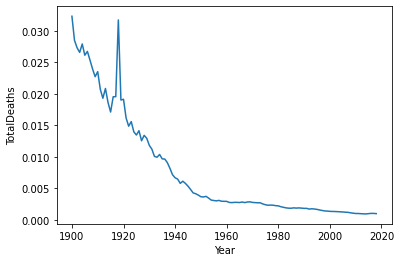

In [177]:
# Create a line plot that shows the total death rate by year.
mortality_wide["TotalDeaths"].plot(x='Year', xlabel='Year', ylabel='TotalDeaths')